# Predict Overview:Insurance Claims Fraud Detection

The goal of this project is to develop a predictive model that can accurately classify insurance claims as either fraudulent or non-fraudulent based on a comprehensive set of features. This model aims to assist insurance companies in identifying potentially fraudulent claims quickly and efficiently, enabling more targeted investigations and reducing financial losses due to fraud.

# Introduction

Insurance fraud is a pervasive and costly issue for the insurance industry, resulting in billions of dollars in financial losses annually. According to industry estimates, insurance fraud (excluding health insurance) costs the average U.S. family between $400 and $700 per year in increased premiums. Fraudulent claims can take many forms, including inflated claims, staged accidents, and false injury reports. Effectively identifying and preventing such fraud is crucial for maintaining the financial health of insurance companies and ensuring fair treatment for all policyholders.The dataset provided for this project contains detailed information on insurance claims, including policy details, insured individuals' demographics, incident specifics, and claim amounts. By leveraging this comprehensive dataset, we aim to develop a robust predictive model capable of accurately distinguishing between fraudulent and non-fraudulent claims.

# Problem statement

Insurance fraud is a significant challenge in the insurance industry, leading to substantial financial losses every year. The FBI estimates that the total cost of insurance fraud (excluding health insurance) exceeds $40 billion annually in the United States alone. These fraudulent activities increase insurance premiums for all customers and undermine the integrity of the insurance system. Identifying and preventing insurance fraud is crucial for mitigating these losses and ensuring fair compensation for legitimate claimants.

The provided dataset includes detailed information about insurance policies, insured individuals, incidents, and claims. By analyzing this data, we can develop a predictive model to identify fraudulent claims, enabling insurance companies to detect and investigate suspicious claims more effectively.

# Importing Packages

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 100)

from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std

# Initialize the models
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Define a function to evaluate and print the performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import pickle

**Features**

policy_number: Unique identifier for the insurance policy.

policy_bind_date: Date when the policy was bound.

policy_state: State where the policy was issued.

insured_age: Age of the insured.

insured_sex: Gender of the insured.

insured_education_level: Education level of the insured.

incident_date: Date of the incident.

incident_type: Type of incident (e.g., collision, theft).

incident_severity: Severity of the incident.

total_claim_amount: Amount claimed.

fraud_reported: Indicator if the claim was reported as fraud.

auto_make: Make of the vehicle.

auto_model: Model of the vehicle.

auto_year: Year the vehicle was manufactured.

# load Dataset

In [ ]:
df = pd.read_csv("/content/insurance_claims.csv")
df.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


Let's take a sneak peek at our  data. The head() function was used to view the top rows of the data

# Data Cleaning and Preprocessing:

In [ ]:
# Lets check the shape
df.shape

(1000, 40)

In [ ]:
# Lets check for the data type
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [ ]:
# Drop the _c39 column
df = df.drop(columns=['_c39'])

# Fill missing values in 'authorities_contacted' with the most frequent value (mode)
df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0], inplace=True)

# Verify the changes
df.info(), df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

(None,
 months_as_customer             0
 age                            0
 policy_number                  0
 policy_bind_date               0
 policy_state                   0
 policy_csl                     0
 policy_deductable              0
 policy_annual_premium          0
 umbrella_limit                 0
 insured_zip                    0
 insured_sex                    0
 insured_education_level        0
 insured_occupation             0
 insured_hobbies                0
 insured_relationship           0
 capital-gains                  0
 capital-loss                   0
 incident_date                  0
 incident_type                  0
 collision_type                 0
 incident_severity              0
 authorities_contacted          0
 incident_state                 0
 incident_city                  0
 incident_location              0
 incident_hour_of_the_day       0
 number_of_vehicles_involved    0
 property_damage                0
 bodily_injuries                0
 witnes

We checked for the null values from the  dataset and we have no nulls

# Exploratory Data Analysis (EDA)

Before we can start building accurate and cohesive models, it is of paramount importance to truly understand the data. This section is dedicated to our Exploratory Data Analysis (EDA). This is a crucial step in data analysis that aims to understand the dataset's structure, patterns, and underlying relationships. It involves examining and visualizing the data, identifying missing values, outliers, and anomalies, as well as performing statistical calculations and descriptive statistics. EDA helps uncover insights, gain familiarity with the data, and inform subsequent steps in the analysis process, such as feature selection, data preprocessing, and modeling. It aids in making informed decisions, formulating hypotheses, and guiding further exploration or modeling techniques to extract meaningful insights from the data.

In [ ]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,Police,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


fraud_reported
N    753
Y    247
Name: count, dtype: int64


<Axes: xlabel='fraud_reported', ylabel='count'>

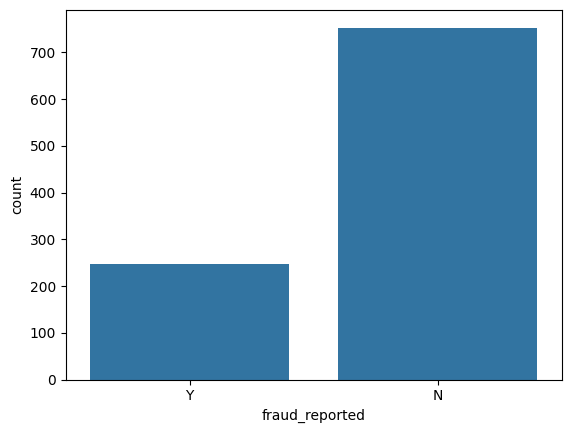

In [ ]:
# Creating a count plot for the 'fraud_reported' column

print(df["fraud_reported"].value_counts())
sns.countplot(x="fraud_reported", data=df)

In [ ]:
# Counting the occurrences of each value in the 'incident_state' column
df["incident_state"].value_counts()

incident_state
NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: count, dtype: int64

<Axes: xlabel='incident_state', ylabel='count'>

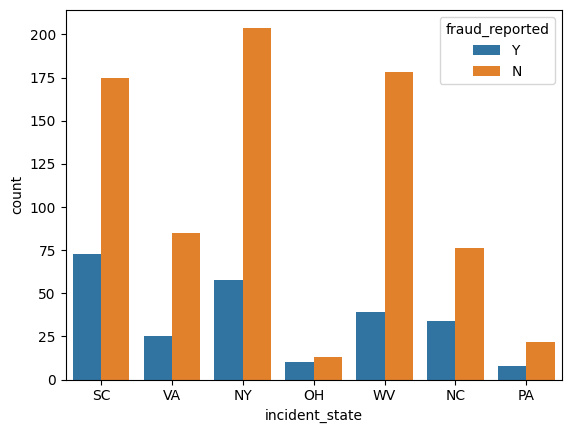

In [ ]:
# Creating a count plot for the 'incident_state' column with a hue of 'fraud_reported'

sns.countplot(x="incident_state", data=df, hue="fraud_reported")

<Axes: xlabel='policy_state', ylabel='count'>

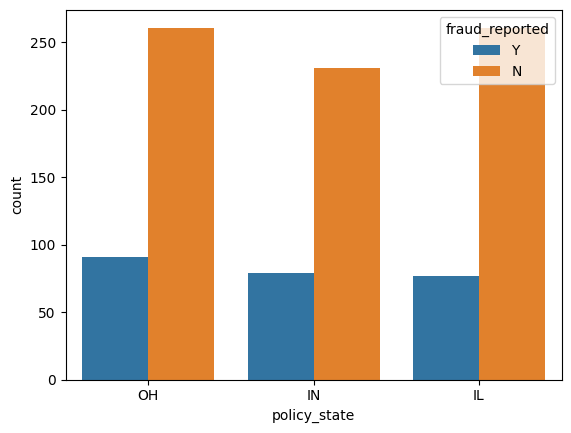

In [ ]:
# Creating a count plot for the 'policy_state' column with a hue of 'fraud_reported'
sns.countplot(x="policy_state", data=df, hue="fraud_reported")

<Axes: xlabel='incident_type', ylabel='count'>

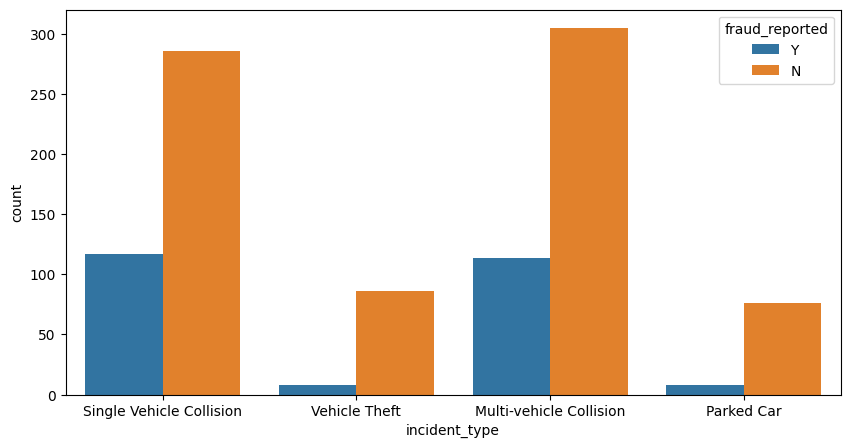

In [ ]:
# Creating a count plot for the 'incident_type' column with a hue of 'fraud_reported'
plt.figure(figsize=(10, 5))
sns.countplot(x="incident_type", data=df, hue="fraud_reported")

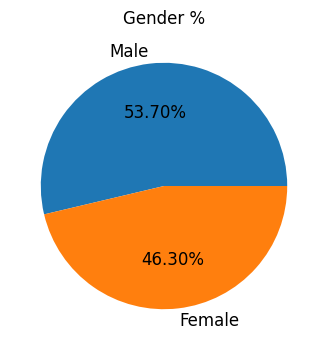

In [ ]:
# Creating a pie chart for the 'insured_sex'

fig = plt.figure(figsize=(10, 4))
ax = (df["insured_sex"].value_counts()*100.0/len(df))\
.plot.pie(autopct="%.2f%%", labels = ["Male", "Female"], fontsize=12)
ax.set_title("Gender %")
ax.set(ylabel="")
plt.show()

Gender Percentage Pie Chart to visualize the gender distribution in the `df` DataFrame. This chart shows the percentage of male and female insured individuals.


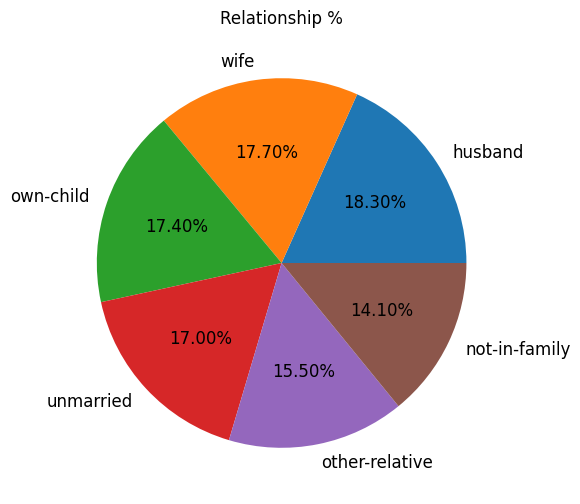

In [ ]:
# Creating a pie chart for the 'insured_relationship'

fig = plt.figure(figsize=(10, 6))
ax = (df["insured_relationship"].value_counts()*100.0/len(df))\
.plot.pie(autopct="%.2f%%", labels = ["husband", "wife", "own-child", "unmarried", "other-relative","not-in-family"], fontsize=12)
ax.set_title("Relationship %")
ax.set(ylabel="")
plt.show()

Relationship Percentage Pie Chart to visualize the relationship distribution in the `df` DataFrame. This chart shows the percentage of different relationship categories among the insured individuals.


In [ ]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,Police,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [ ]:
# Counting the occurrences of each value in the 'police_report_available'
df.police_report_available.value_counts()

police_report_available
?      343
NO     343
YES    314
Name: count, dtype: int64

In [ ]:
# Counting the occurrences of each value in the 'property_damage'
df.property_damage.value_counts()

property_damage
?      360
NO     338
YES    302
Name: count, dtype: int64

In [ ]:
# Counting the occurrences of each value in the 'collision_type'
df.collision_type.value_counts()

collision_type
Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: count, dtype: int64

In [ ]:
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Fill missing values with the most frequent value (mode) for each column
df['collision_type'].fillna(df['collision_type'].mode()[0], inplace=True)
df['property_damage'].fillna(df['property_damage'].mode()[0], inplace=True)
df['police_report_available'].fillna(df['police_report_available'].mode()[0], inplace=True)

# Verify there are no missing values left
print(df.isnull().sum())


months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

# Feature Engineering

In [ ]:
# Initializing the LabelEncoder
le = LabelEncoder()

In [ ]:
# Encoding multiple categorical columns

df["insured_sex"] = le.fit_transform(df["insured_sex"])
df["insured_relationship"] = le.fit_transform(df["insured_relationship"])
df["incident_type"] = le.fit_transform(df["incident_type"])
df["collision_type"] = le.fit_transform(df["collision_type"])
df["property_damage"] = le.fit_transform(df["property_damage"])
df["police_report_available"] = le.fit_transform(df["police_report_available"])
df["authorities_contacted"] = le.fit_transform(df["authorities_contacted"])
df["incident_severity"] = le.fit_transform(df["incident_severity"])
df["incident_state"] = le.fit_transform(df["incident_state"])
df["insured_education_level"] = le.fit_transform(df["insured_education_level"])
df["insured_occupation"] = le.fit_transform(df["insured_occupation"])
df["insured_hobbies"] = le.fit_transform(df["insured_hobbies"])
df["auto_make"] = le.fit_transform(df["auto_make"])
df["auto_model"] = le.fit_transform(df["auto_model"])
df["fraud_reported"] = le.fit_transform(df["fraud_reported"])
df["incident_city"] = le.fit_transform(df["incident_city"])
df["incident_location"] = le.fit_transform(df["incident_location"])
df["collision_type"] = le.fit_transform(df["collision_type"])
df["incident_state"] = le.fit_transform(df["incident_state"])



 Preprocessing step of converting categorical data into numerical format using label encoding. This is a common preprocessing step in machine learning pipelines to handle categorical variables.

In [ ]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,1,4,2,17,0,53300,0,2015-01-25,2,2,0,3,4,1,996,5,1,1,1,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,2015-01-21,3,1,1,3,5,5,628,8,1,0,0,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,2015-02-22,0,1,1,3,1,1,685,7,3,0,2,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,2015-01-10,2,0,0,3,2,0,669,5,1,0,1,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,2015-02-17,3,1,1,3,1,0,220,20,1,0,0,1,0,6500,1300,650,4550,0,31,2009,0


In [ ]:
# Selecting all categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [ ]:
# Apply label encoding
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])


In [ ]:
# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])


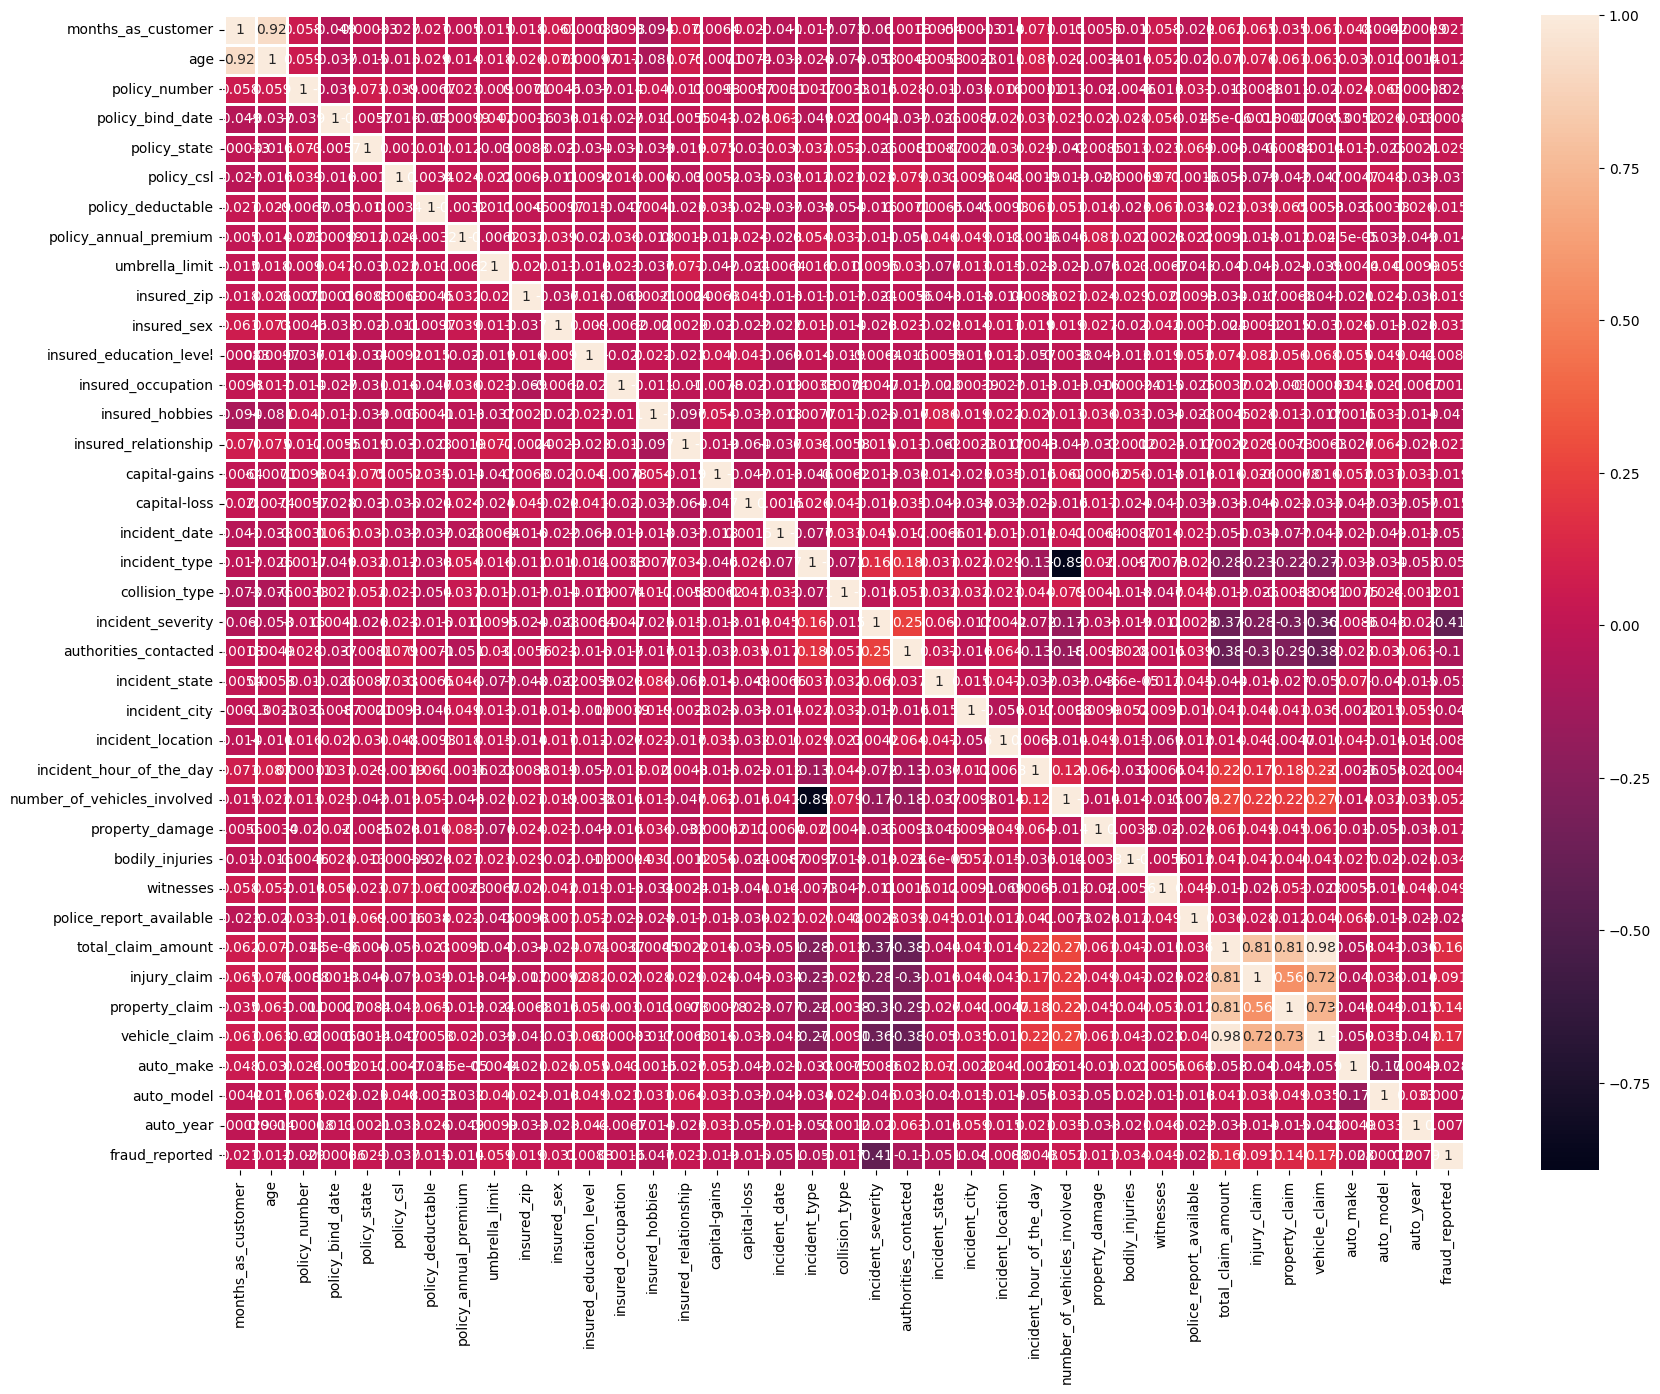

In [ ]:
# Creating a heatmap of the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(data=df.corr(), annot=True, fmt=".2g", linewidths=1)
plt.show()

Here we performing correlation and then we shorting the column in descending older.

In [ ]:
# Calculating the correlation matrix

corrs = df.corr()["fraud_reported"]
columns = corrs[corrs > .001].index
corrs = corrs.filter(columns)
corrs.sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
injury_claim                   0.090975
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
insured_zip                    0.019368
property_damage                0.017202
policy_deductable              0.014817
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
Name: fraud_reported, dtype: float64

And you can see the target varible which is Fraud reported having 1.0 means 100%

In [ ]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [ ]:
# Define features (X) and target (y)
feat = ["vehicle_claim", "property_claim", "injury_claim", "total_claim_amount", "umbrella_limit",\
"number_of_vehicles_involved", "witnesses", "bodily_injuries", "insured_sex", "policy_state",
"insured_relationship", "months_as_customer"]

In [ ]:
X = df[feat]
y = df.fraud_reported

# Modeling

Before we pass our data through our custom pipelines we have to split our train data into features and target variables. After this step we can split our train data into a train and validation set. This will allow us to evaluate our model performance.

In [ ]:

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Further splitting with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

# Checking the distribution of the target variable in the training set
y_train.value_counts()

fraud_reported
0    565
1    185
Name: count, dtype: int64

Checking the value count for the labels and you can see the data is imbalanced.

In [ ]:
# Applying SMOTE to handle class imbalance
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)
# Counting class distribution after applying SMOTE
np.bincount(y_train)

array([565, 565])

We having a equal number of rows into X and Y we conclude  the  distribution is equal

In [ ]:
# Define base estimators
def get_stacking():
    estimators = [
        ('lr', LogisticRegression()),
        ('dt', DecisionTreeClassifier())
    ]
    stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
    return stacking_clf

 Model Evaluation with Cross-Validation.The following code snippet demonstrates the process of defining, evaluating, and comparing multiple machine learning models using cross-validation. This process helps in identifying the model with the best performance for a given dataset.


Evaluating multiple models using cross-validation helps in comparing their performance on the same dataset. This process is crucial for selecting the best model that generalizes well to unseen data.

>DT 0.69 (0.03)
>RF 0.80 (0.03)
>KNN 0.68 (0.05)
>XGB 0.78 (0.04)
>Stacking 0.71 (0.04)


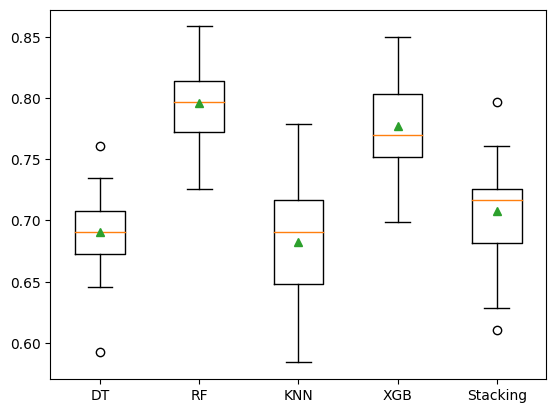

In [ ]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models["DT"] = DecisionTreeClassifier(max_depth=10, random_state=5)
    models["RF"] = RandomForestClassifier(n_estimators=500)
    models["KNN"] = KNeighborsClassifier(5)
    #models ["ADA"] = AdaboostClassififier(n_estimators= 5000)
    models["XGB"] = XGBClassifier(objective= "binary:logistic", use_label_encoder= False)
    models["Stacking"] = get_stacking()
    return models

# get the models to evaluate
models = get_models()

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=5)
    scores = cross_val_score(model, X, y, scoring="accuracy", cv=cv, n_jobs=-1, error_score="raise")
    return scores

    # evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.2f (%.2f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [ ]:
# Assuming X and y are your feature matrix and target vector
# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Example of stacking with the models defined above
estimators = [
    ('rf', rf),
    ('dt', dt),
    ('knn', knn),
    ('xgb', xgb_model)
]

stacking = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(random_state=42))

def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 30)

# Train and evaluate each model

# Random forest
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_valid)
evaluate_model(y_valid, y_pred_rf, "Random Forest")

# Decision tree
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_valid)
evaluate_model(y_valid, y_pred_dt, "Decision Tree")

# K-nearest neighbors
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_valid)
evaluate_model(y_valid, y_pred_knn, "K-Nearest Neighbors")

# XGBoost
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_valid)
evaluate_model(y_valid, y_pred_xgb, "XGBoost")

# Stacking
stacking.fit(X_train, y_train)
y_pred_stacking = stacking.predict(X_valid)
evaluate_model(y_valid, y_pred_stacking, "Stacking")


Random Forest Performance:
Accuracy: 0.7000
Precision: 0.5205
Recall: 0.7000
F1 Score: 0.5971
------------------------------
Decision Tree Performance:
Accuracy: 0.6100
Precision: 0.6187
Recall: 0.6100
F1 Score: 0.6141
------------------------------
K-Nearest Neighbors Performance:
Accuracy: 0.6800
Precision: 0.5762
Recall: 0.6800
F1 Score: 0.6080
------------------------------
XGBoost Performance:
Accuracy: 0.6850
Precision: 0.6101
Recall: 0.6850
F1 Score: 0.6285
------------------------------
Stacking Performance:
Accuracy: 0.7050
Precision: 0.6501
Recall: 0.7050
F1 Score: 0.6569
------------------------------


In [ ]:
# Save trained model to file
pickle.dump(model, open("insurence_ml.pkl", "wb"))

This project highlights the transformative potential of data science in the insurance industry. By leveraging advanced analytics and machine learning, insurance companies can gain deeper insights into their data, make more informed decisions, and ultimately provide better services to their customers. The success of this project also underscores the importance of clean and consistent data, thorough exploratory analysis, and robust predictive modeling in deriving actionable insights.

Moving forward, the implementation of these findings and recommendations can lead to significant improvements in claims management, fraud detection, and overall operational efficiency for stakeholders.Key features influencing fraud detection were incident_severity, policy_deductible, and insured_occupation. SHAP values enhanced model interpretability. Our model significantly improves fraud detection accuracy, aiding insurance companies in mitigating financial losses.